# GEMM

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("./profile/A100-SXM-80GB/comp/gemm.csv")

In [5]:
data['flops'] = data['m'] * data['k'] * data['n'] * 2
data['mems'] = (data['m'] + data['n']) * data['k'] * 2
data['flops_time'] = data['flops'] / 312 * 10**12 # TFLOP/s
data['mems_time'] = data['mems'] / (2.0 * 10**12) # TB/s
data['est_time'] = data['flops_time'] + data['mems_time']

In [6]:
data

,gpu,dtype,m,k,n,time(us),avg_power(W),avg_energy(uJ),flops,mems,flops_time,mems_time,est_time
0,A100-SXM-80GB,half,1,1,1,13,95.925000,1.247025e+03,2,4,6.410256e+09,2.000000e-12,6.410256e+09
1,A100-SXM-80GB,half,1,1,2,10,95.780000,9.578000e+02,4,6,1.282051e+10,3.000000e-12,1.282051e+10
2,A100-SXM-80GB,half,1,1,3,9,95.520000,8.596800e+02,6,8,1.923077e+10,4.000000e-12,1.923077e+10
3,A100-SXM-80GB,half,1,1,4,10,95.925000,9.592500e+02,8,10,2.564103e+10,5.000000e-12,2.564103e+10
4,A100-SXM-80GB,half,1,1,5,9,96.290000,8.666100e+02,10,12,3.205128e+10,6.000000e-12,3.205128e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274603,A100-SXM-80GB,half,32768,32768,64896,556002,498.085703,2.769366e+08,139363098820608,6400507904,4.466766e+23,3.200254e-03,4.466766e+23
274604,A100-SXM-80GB,half,32768,32768,65024,556103,496.489182,2.760991e+08,139637976727552,6408896512,4.475576e+23,3.204448e-03,4.475576e+23
274605,A100-SXM-80GB,half,32768,32768,65152,553829,497.927053,2.757664e+08,139912854634496,6417285120,4.484386e+23,3.208643e-03,4.484386e+23
274606,A100-SXM-80GB,half,32768,32768,65280,560438,464.085831,2.600913e+08,140187732541440,6425673728,4.493197e+23,3.212837e-03,4.493197e+23


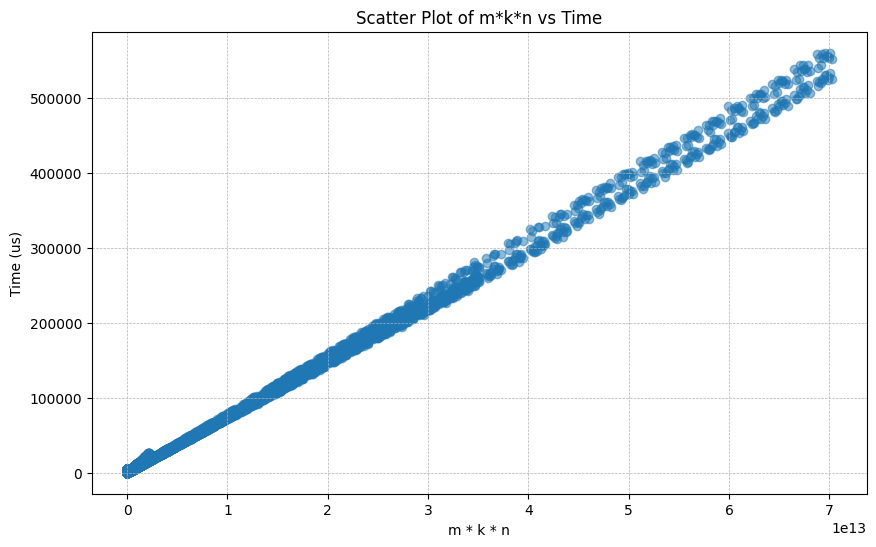

In [8]:
import matplotlib.pyplot as plt

# Calculate m*k*n
data['mkn'] = data['m'] * data['k'] * data['n']

# Plot the scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(data['mkn'], data['time(us)'], alpha=0.5)
plt.title('Scatter Plot of m*k*n vs Time')
plt.xlabel('m * k * n')
plt.ylabel('Time (us)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


# Attn

In [20]:
import pandas as pd

In [10]:
attn_data = pd.read_csv("./profile/A100-SXM-80GB/comp/attn.csv")

In [12]:
attn_data['tokens'] = attn_data['sf'] * 1024

In [23]:
# attn_data.sort_values(by=['nhead', 'head_dim', 'tp', 'cp', 'tokens',], inplace=True)
# attn_data = attn_data[['tp', 'cp', 'tokens', 'time(us)', 'nhead', 'head_dim']]
attn_data
attn_data.to_csv("./A100-SXM-80GB/comp/attn.csv", index=False)


# Time Estimation

In [1]:
import pandas as pd

In [3]:
# mlp: gpu,dtype,m,k,n,time(us),avg_power(W),avg_energy(uJ)
mlp_df = pd.read_csv("./profile/A100-SXM-80GB/comp/gemm.csv")
# all_gather: gpu,num_nodes,num_gpus_per_node,dtype,size(kb),time(us),gpu_freq,energy(J)
all_gather_df = pd.read_csv("./profile/A100-SXM-80GB/comm/all_gather.csv")
# all_reduce: gpu,num_nodes,num_gpus_per_node,dtype,size(kb),time(us),gpu_freq,energy(J)
all_reduce_df = pd.read_csv("./profile/A100-SXM-80GB/comm/all_reduce.csv")
# reduce_scatter: gpu,num_nodes,num_gpus_per_node,dtype,size(kb),time(us),gpu_freq,energy(J)
reduce_scatter_df = pd.read_csv("./profile/A100-SXM-80GB/comm/reduce_scatter.csv")
# attn: gpu,tp,cp,tokens,time(us),nhead,head_dim
attn_data = pd.read_csv("./profile/A100-SXM-80GB/comp/attn.csv")

In [ ]:
def get_mlp_time(m, k, n):
    pass

In [ ]:
def symmetric_check(m, k, n):
    a = mlp_df[
        (mlp_df['m'] == m) &
        (mlp_df['k'] == k) &
        (mlp_df['n'] == n)
    ]['time(us)'].values[0]
    b = mlp_df[
        (mlp_df['m'] == n) &
        (mlp_df['k'] == k) &
        (mlp_df['n'] == m)
    ]['time(us)'].values[0]
    return a, b
